In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img


from tqdm import tqdm
from tensorflow.keras.utils import to_categorical 


from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import LearningRateSchedul

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'tensorflow.python.tools'

In [3]:
TrainDir = r"images/train" 
TestDir = r"images/validation"

In [4]:
def createDataFrame(Dir):
  imgPaths = []
  imgLabels = []
  
  for label in os.listdir(Dir):
    for img in os.listdir(os.path.join(Dir,label)):
      imgPaths.append(os.path.join(Dir,label,img))
      imgLabels.append(label)
    print(label, "Completed")
  return imgPaths, imgLabels

In [5]:
train = pd.DataFrame()
test = pd.DataFrame()

train['images'], train['labels'] = createDataFrame(TrainDir)
print()
test['images'], test['labels'] = createDataFrame(TestDir)

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


In [6]:
train

,images,labels
0,images/train\angry\0.jpg,angry
1,images/train\angry\1.jpg,angry
2,images/train\angry\10.jpg,angry
3,images/train\angry\10002.jpg,angry
4,images/train\angry\10016.jpg,angry
...,...,...
28816,images/train\surprise\9969.jpg,surprise
28817,images/train\surprise\9985.jpg,surprise
28818,images/train\surprise\9990.jpg,surprise
28819,images/train\surprise\9992.jpg,surprise


In [7]:
test

,images,labels
0,images/validation\angry\10052.jpg,angry
1,images/validation\angry\10065.jpg,angry
2,images/validation\angry\10079.jpg,angry
3,images/validation\angry\10095.jpg,angry
4,images/validation\angry\10121.jpg,angry
...,...,...
7061,images/validation\surprise\9806.jpg,surprise
7062,images/validation\surprise\9830.jpg,surprise
7063,images/validation\surprise\9853.jpg,surprise
7064,images/validation\surprise\9878.jpg,surprise


In [8]:
def featureExtraction(images):
    imgFeatures = []
    
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale')
        img = np.array(img)
        imgFeatures.append(img)
    imgFeatures = np.array(imgFeatures)
    imgFeatures = imgFeatures.reshape(len(imgFeatures),48,48,1)
    
    return imgFeatures

In [9]:
train_features = featureExtraction(train['images'])

100%|██████████| 28821/28821 [02:09<00:00, 223.38it/s]


In [10]:
test_features = featureExtraction(test['images'])

100%|██████████| 7066/7066 [00:39<00:00, 177.39it/s]


In [11]:
x_train = train_features/255.0
x_test = test_features/255.0


In [12]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
le.fit(train['labels'])

y_train = le.transform(train['labels'])
y_test = le.transform(test['labels'])

In [13]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [14]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# # Model
# model = Sequential()

# # Input Layer
# model.add(Input(shape=(48, 48, 1)))

# # Convolutional layers
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# # Fully connected layers
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(7, activation='softmax'))

# # Compile
# model.compile(optimizer=Adam(learning_rate=1e-3), 
#               loss='categorical_crossentropy', 
#               metrics=['categorical_accuracy'])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Training
# model.fit(x=x_train, 
#           y=y_train, 
#           batch_size=128, 
#           epochs=100, 
#           validation_data=(x_test, y_test), 
#           callbacks=[early_stopping])


In [15]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
# from tensorflow.keras.utils import to_categorical
# import numpy as np

# # Assuming that you already have x_train, x_test, y_train, y_test prepared from your previous code

# # Define the model architecture
# model = Sequential()

# # Input layer and first convolutional block
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(48, 48, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))

# # Second convolutional block
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))

# # Third convolutional block
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))

# # Flatten the output
# model.add(Flatten())

# # Fully connected layer
# model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dropout(0.3))

# # Output layer with 7 classes
# model.add(Dense(7, activation='softmax'))

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), 
#               loss='categorical_crossentropy', 
#               metrics=['categorical_accuracy'])

# # Define the learning rate scheduler function
# def scheduler(epoch, lr):
#     if epoch < 10:
#         return lr
#     else:
#         return lr * tf.math.exp(-0.1)  # Decay the learning rate

# # Define early stopping to avoid overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model
# history = model.fit(
#     x_train, y_train,  # Training data
#     epochs=100,  # Number of epochs
#     batch_size=32,  # Batch size
#     validation_data=(x_test, y_test),  # Validation data
#     callbacks=[early_stopping, LearningRateScheduler(scheduler)],  # Callbacks for learning rate and early stopping
#     steps_per_epoch=x_train.shape[0] // 32,  # Number of steps per epoch
#     validation_steps=x_test.shape[0] // 32  # Number of validation steps
# )

# # Evaluate the model
# loss, accuracy = model.evaluate(x_test, y_test)
# print(f"Test Loss: {loss}")
# print(f"Test Accuracy: {accuracy}")

# # Optional: plot the training history
# plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.show()


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Model
model = Sequential()

# Input Layer
model.add(Input(shape=(48, 48, 1)))

# Convolutional layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
# Output layer
model.add(Dense(7, activation='softmax'))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Training
model.fit(x=x_train, 
          y=y_train, 
          batch_size=128, 
          epochs=100, 
          validation_data=(x_test, y_test), 
          callbacks=[early_stopping])


Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 63s 269ms/step - categorical_accuracy: 0.1891 - loss: 2.8586 - val_categorical_accuracy: 0.2583 - val_loss: 2.0341
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 79s 351ms/step - categorical_accuracy: 0.2100 - loss: 2.0025 - val_categorical_accuracy: 0.2583 - val_loss: 2.1911
Epoch 3/100
132/226 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step - categorical_accuracy: 0.2180 - loss: 1.9083

KeyboardInterrupt: 

In [ ]:


model_json = model.to_json()
with open("emothionDetectorGPU.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emothionDetectorGPU.h5")

In [ ]:
from keras.models import model_from_json

Original Image is of sad
1/1 [==============================] - 0s 212ms/step
model predictoin is :  sad


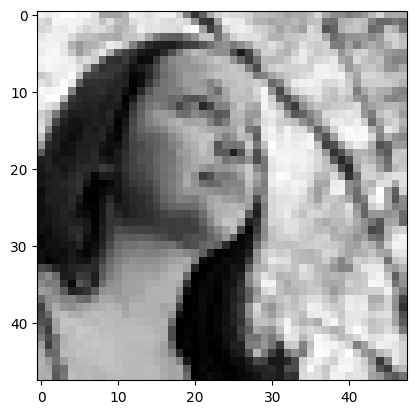

In [ ]:
json_file = open("emothionDetectorGPU.json", 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emothionDetectorGPU.h5")


label = ['angry','disgust','fear','happy','neutral','sad','surprise']

def ef(image):
    img = load_img(image,color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

fstring = 'sad'
image = f'images/train/{fstring}/35825.jpg'
print("Original Image is of sad")


img = ef(image)

pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model predictoin is : ", pred_label)



plt.imshow(img.reshape(48,48), cmap='gray')

